# LeNet-CIFAR10
进行500轮实验

In [22]:
import pandas as pd

# 读取两个CSV文件
df1 = pd.read_csv('/home/zhaojia-raoxy/files/LeNet',header=None, names=['loss_train_FL','loss_test_FL','acc_train_FL','acc_test_FL'])
df2 = pd.read_csv('/home/zhaojia-raoxy/files/LeNet-no-fed',header=None, names=['loss_train_nFL','loss_test_nFL','acc_train_nFL','acc_test_nFL'])
# 水平方向上合并两个DataFrame
df = pd.concat([df1, df2], axis=1).iloc[1:]
df.reset_index(drop=True, inplace=True)
df

,loss_train_FL,loss_test_FL,acc_train_FL,acc_test_FL,loss_train_nFL,loss_test_nFL,acc_train_nFL,acc_test_nFL
0,2.3103454,2.3066835,0.0997,0.099999994,2.310793794631958,2.307388195991516,0.10104,0.1
1,2.3084183,2.3054254,0.09856,0.099999994,2.30894460105896,2.3078724098205567,0.10198,0.1
2,2.3072054,2.3033433,0.0989,0.099999994,2.3080010385513305,2.3067504501342775,0.09918,0.1
3,2.3062642,2.3058856,0.09974,0.099999994,2.3065032062530517,2.306841425895691,0.1004,0.1007
4,2.3052032,2.3027496,0.10048,0.099999994,2.3053532047271728,2.3051188707351686,0.09948,0.1
...,...,...,...,...,...,...,...,...
495,0.8996581,1.05019,0.68758,0.6325,0.9120158197879791,1.0441337680816651,0.68248,0.6353
496,0.9004845,1.0533855,0.68714,0.629,0.9103594462871551,1.045170078277588,0.68172,0.6327
497,0.90091974,1.0526575,0.68604,0.6293,0.9099764807224273,1.0467488276958465,0.6833,0.6341
498,0.89848375,1.0516046,0.68873996,0.6319,0.9098450560569763,1.0380935502052306,0.68202,0.6334


In [26]:
# 将列转换为数值类型，错误值将被强制转换为NaN
df['loss_train_FL'] = pd.to_numeric(df['loss_train_FL'], errors='coerce')
df['loss_test_FL'] = pd.to_numeric(df['loss_test_FL'], errors='coerce')
df['acc_train_FL'] = pd.to_numeric(df['acc_train_FL'], errors='coerce')
df['acc_test_FL'] = pd.to_numeric(df['acc_test_FL'], errors='coerce')
df['loss_train_nFL'] = pd.to_numeric(df['loss_train_nFL'], errors='coerce')
df['loss_test_nFL'] = pd.to_numeric(df['loss_test_nFL'], errors='coerce')
df['acc_train_nFL'] = pd.to_numeric(df['acc_train_nFL'], errors='coerce')
df['acc_test_nFL'] = pd.to_numeric(df['acc_test_nFL'], errors='coerce')

<IPython.core.display.Javascript object>


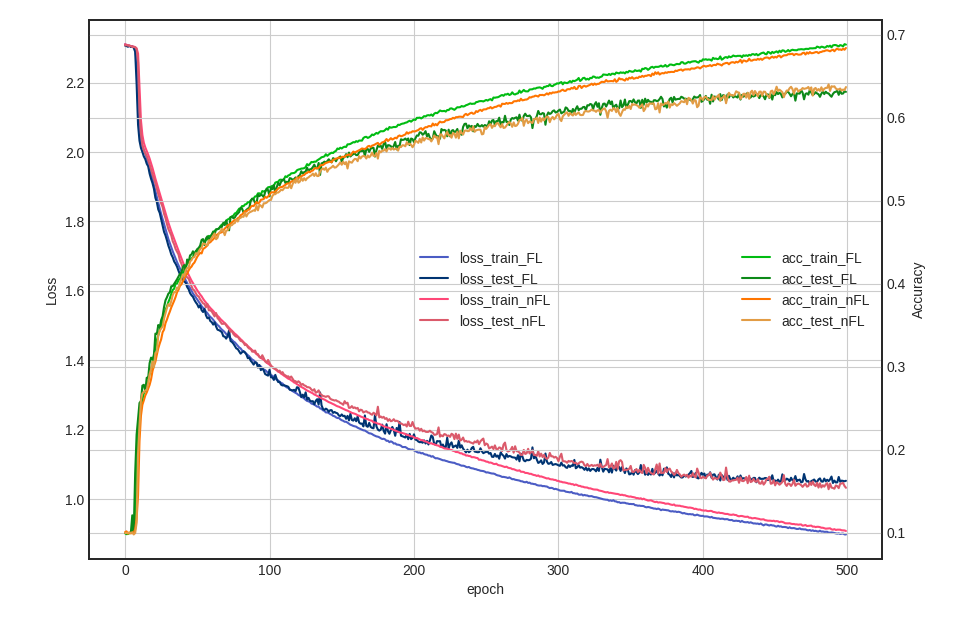

In [51]:
mpl.style.use('seaborn-white')
# 将DataFrame中的数据进行可视化，设置两个y轴
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
# mpl.use('nbAgg')

ax = df[['loss_train_FL', 'loss_test_FL','loss_train_nFL','loss_test_nFL']].plot(color=['#4b5cc4','#003472','#ff4777','#db5a6b'])
# 创建一个新的Axes对象，共享x轴
ax2 = ax.twinx()
# 绘制'acc_train'和'acc_test'在右侧y轴
df[['acc_train_FL', 'acc_test_FL','acc_train_nFL','acc_test_nFL']].plot(ax=ax2, color=['#00bc12', '#0c8918','#ff7500', '#e29c45'])
# 设置左侧y轴标签
ax.set_ylabel('Loss')
ax.set_xlabel('epoch')
# 设置右侧y轴标签
ax2.set_ylabel('Accuracy')
ax.grid(True)
ax2.grid(True)
plt.tight_layout()
ax.legend(loc='center')
ax2.legend(loc='center right')
# 显示图形
plt.show()

用了联邦学习后，在测试集上的准确率会比不用的稍微高一点（右侧第二对）土黄色后期深绿色的高。

用了联邦学习后，在测试集上的损失值会比不用的稍微高一点（右侧第三队）深蓝色后期比洋红色高。

轮收敛速度的话，联邦学习会比不用的快（loss ，蓝色是用了联邦平均的 ； acc 绿色是用了联邦平均的）